## 🎧 擷取特定音訊段落（Audio Segment Extraction）

這段程式碼的目的在於：
**從 Apple 公司 2024 Q3 財報電話會議（Earnings Call）的 MP3 音檔中，擷取 CEO / CFO 的發言片段，並另存為 WAV 格式。**

### 📌 處理流程如下：
1. 使用 `pydub` 套件讀入 MP3 音訊檔案。
2. 根據設定的時間區間（以毫秒為單位）擷取出對應的段落。
3. 將擷取的音訊段落輸出並儲存為 `.wav` 檔案，便於後續分析（如聲音特徵提取、語音辨識或情緒判讀等）。

### 🕒 擷取設定說明：
- `start_time = 796000`：指定擷取開始時間（例如，13 分 16 秒）。
- `end_time = 1418000`：指定擷取結束時間（例如，23 分 38 秒）。
- 匯出的檔案為：`Apple_Q3_2024EarningsCall_CFO_1.wav`

這對於執行音訊分析、重點摘要或是進行情緒辨識等任務非常實用，尤其當只需處理發言重點而非整段通話時。


In [1]:
from pydub import AudioSegment

# 載入 MP3 檔案
audio = AudioSegment.from_mp3("Apple_Q3_2024EarningsCall.mp3")

# 指定擷取的時間段 (以毫秒為單位)
start_time = 796000  # 開始時間 (例如 30秒，即 30000 毫秒)
end_time = 1418000    # 結束時間 (例如 60秒，即 60000 毫秒)

# 擷取指定區間的音頻
audio_segment = audio[start_time:end_time]

# 將擷取的區間轉換並保存為 WAV 檔案
audio_segment.export("Apple_Q3_2024EarningsCall_CFO_1.wav", format="wav")

<_io.BufferedRandom name='Apple_Q3_2024EarningsCall_CFO_1.wav'>

## 音訊特徵處理與歸一化

此段程式碼使用 `pyAudioAnalysis` 庫從兩個音頻檔案中提取短期音訊特徵，並對每個特徵進行簡單的歸一化處理。

### 流程概述：
1. **載入音訊檔案**：從指定的檔案路徑讀取音訊並轉換為單聲道（若為立體聲）。
2. **特徵提取**：使用短期特徵提取方法，計算音訊的特徵。
3. **檢查特徵變化**：檢查每個特徵的最大值和最小值，若相等則提示不變特徵，並建議調整或移除。
4. **歸一化處理**：對每個特徵進行歸一化，避免數據範圍不同的問題。
5. **計算平均值**：對每個特徵計算其平均值，作為代表特徵。

### 輸出結果：
- **特徵名稱**：列出每個音訊檔案的特徵名稱。
- **歸一化後的平均特徵**：顯示每個音訊檔案的特徵平均值。

此流程可應用於語音分析、情緒識別或其他音訊處理任務。


In [ ]:
from pyAudioAnalysis import ShortTermFeatures as sF
from pyAudioAnalysis import audioBasicIO
import numpy as np

# 函數：加載並處理音頻文件
def process_audio_file(file_path):
    [fs, signal] = audioBasicIO.read_audio_file(file_path) # fs 是每秒採樣次數，signal 是音頻信號
    signal = audioBasicIO.stereo_to_mono(signal)  # 如果是立體聲，轉換為單聲道

    # 提取短期音頻特徵
    win_size, step_size = 0.05, 0.025  # 設定窗口長度和步幅
    features, feature_names = sF.feature_extraction(signal, fs, win_size * fs, step_size * fs)

    # 檢查每個特徵的範圍
    for i, feature in enumerate(features):
        if np.max(feature) == np.min(feature):  # 檢查該特徵的最大最小值是否相等
            print(f"Feature {feature_names[i]} has no variation, consider removing or adjusting it")

    # 進行簡單的歸一化處理，避免除以零錯誤
    def safe_normalize(feature):
        if np.max(feature) != np.min(feature):
            return (feature - np.min(feature)) / (np.max(feature) - np.min(feature))
        else:
            return feature  # 如果最大值和最小值相等，直接返回原始數據

    # 對所有特徵進行歸一化處理
    normalized_features = np.array([safe_normalize(f) for f in features])

    # 計算每個特徵的平均值
    mean_normalized_features = np.mean(normalized_features, axis=1)

    return feature_names, mean_normalized_features

# 處理第一個音頻文件
file_path_1 = "Apple_Q3_2024EarningsCall_CEO_1.wav"
feature_names_1, mean_normalized_features_1 = process_audio_file(file_path_1)

# 處理第二個音頻文件
file_path_2 = "Apple_Q3_2024EarningsCall_CFO_1.wav"
feature_names_2, mean_normalized_features_2 = process_audio_file(file_path_2)

# 輸出第一個音頻的特徵名稱和平均值
print("Feature names for file 1: ", feature_names_1)
print("Mean normalized features for file 1: ", mean_normalized_features_1)

# 輸出第二個音頻的特徵名稱和平均值
print("Feature names for file 2: ", feature_names_2)
print("Mean normalized features for file 2: ", mean_normalized_features_2)


Feature names for file 1:  ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy', 'delta energy_entropy', 'delta spectral_centroid', 'delta spectral_spread', 'delta spectral_entropy', 'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1', 'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5', 'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9', 'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13', 'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4', 'delta chroma_5', 'delta chroma_6', 'delta chroma_7', 'delta chroma_8', 'delta ch

$$ angle = arctan \left(\dfrac{valenc}{arousal}\right) $$

## 圓形情感模型 (Circumplex Model) 視覺化

此段程式碼根據 **Russell's Circumplex Model**，將兩個音頻檔案的愉悅度（valence）和激發度（arousal）特徵映射到圓形情感模型上。

### 流程概述：
1. **特徵提取**：從每個音頻檔案中提取愉悅度（valence）和激發度（arousal）特徵。
2. **映射到圓形模型**：根據愉悅度與激發度，計算角度並映射到圓形情感模型中。
3. **繪製圓形情感模型**：將兩個音頻點分別標記在圓形模型中，顯示其情感特徵。
   - 使用兩個不同顏色的標記來表示兩個音頻檔案（分別為CEO和CFO的發言）。
   - 設定模型的八個象限：包括愉悅、興奮、激發、困擾、厭惡、抑鬱、困倦、放鬆。

### 視覺化結果：
- 圓形圖顯示了每個音頻檔案的情感分佈，幫助理解其愉悅度和激發度的關係。

這種情感模型可應用於情緒分析、情感識別等領域，直觀地展示情感的多維度變化。


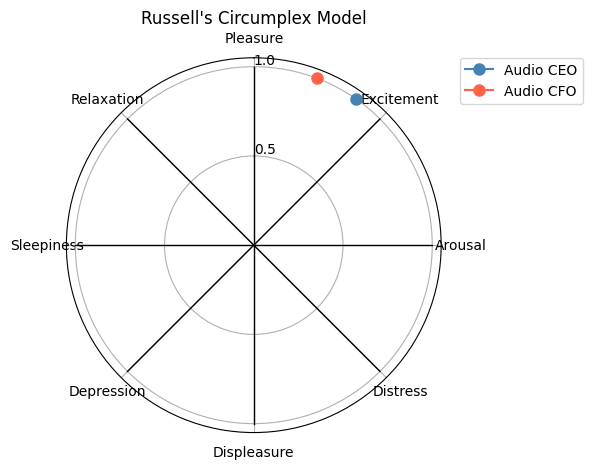

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# 假設兩個音頻文件提取出的特徵
# 分別對應每個音頻的愉悅度（valence）和激發度（arousal）
valence_1 = mean_normalized_features_1[0]  # 第一個音頻的愉悅度特徵
arousal_1 = mean_normalized_features_1[1]  # 第一個音頻的激發度特徵

valence_2 = mean_normalized_features_2[0]  # 第二個音頻的愉悅度特徵
arousal_2 = mean_normalized_features_2[1]  # 第二個音頻的激發度特徵

# 創建一個函數將valence和arousal映射到圓形
def map_to_circumplex(valence, arousal):
    # 計算該點在圓形模型中的角度
    angle = np.degrees(np.arctan2(arousal, valence))  # 計算角度
    if angle < 0:
        angle += 360  # 確保角度在0-360度範圍內
    return angle

# 計算兩個音頻的角度
angle_1 = map_to_circumplex(valence_1, arousal_1)
angle_2 = map_to_circumplex(valence_2, arousal_2)

# 繪製circumplex模型
# 設定情感的八個象限（根據Russell模型）
labels = ['Pleasure', 'Excitement', 'Arousal', 'Distress', 'Displeasure', 'Depression', 'Sleepiness', 'Relaxation']
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)

# 繪製圓形模型
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)  # 設置起始角度
ax.set_theta_direction(-1)  # 逆時針方向

# 繪製情感點，設置zorder以確保點在圓形的邊界線段上方
ax.plot(np.radians(angle_1), 1, color='#4682B4', marker='o', markersize=8, label="Audio CEO", zorder=5)  # 第一個音頻的位置
ax.plot(np.radians(angle_2), 1, color='#FF6347', marker='o', markersize=8, label="Audio CFO", zorder=5)  # 第二個音頻的位置

# 繪製每個區域的邊界
for i in range(8):
    ax.plot([angles[i], angles[(i + 1) % 8]], [0, 1], color='black', lw=1, zorder=2)

# 設置標籤
ax.set_xticks(angles)
ax.set_xticklabels(labels)

# 設置半徑和刻度
#ax.set_rmax(1)  # 設置半徑最大值為1
ax.set_rticks([0.5, 1])  # 設置半徑刻度
ax.set_rlabel_position(0)  # 移除標籤

# 設置圖例在圖形以外的位置
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.title("Russell's Circumplex Model")
plt.tight_layout()  # 防止圖例被截斷
plt.show()
